In [9]:
# Import des modules nécessaires et définition de fonctions pour tracer les courbes
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown
#import sympy as sp

def plotIt(x,y, title="sortie", xlab="X", ylab="Y"):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')

    seaborn.despine(ax=ax, offset=0)

def plotScat(x,y, title="sortie", xlab="X", ylab="Y"):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')

    seaborn.despine(ax=ax, offset=0)

def plotIt2(x1,y1,x2,y2,title="sortie", xlab="X", ylab="Y", legends=""):
    fig, ax = plt.subplots()
    ax.plot(x1, y1, x2,y2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')
    ax.legend(legends)

    seaborn.despine(ax=ax, offset=0)

def plotIt2s(x1,y1,x2,y2,title="sortie", xlab="X", ylab="Y", legends=""):
    fig, ax = plt.subplots()
    ax.plot(x1, y1,'rx')
    ax.plot(x2, y2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')
    ax.legend(legends)

    seaborn.despine(ax=ax, offset=0)



# Réservoir hydraulique

### Q1 : Unité de k

### Q2 : Valeur de k

In [4]:
import sympy as sp
k,rho, H, Pa, g=sp.symbols('k rho H Pa g', positive = True, real = True)
Pf=rho*g*H
q_m=k*sp.sqrt((Pf-Pa))
q=k*sp.sqrt(sp.Abs(Pf-Pa))*sp.sign(Pf-Pa)

In [6]:
q

k*sqrt(Abs(H*g*rho - Pa))*sign(H*g*rho - Pa)

In [7]:
qmes=10 / 1000 / 60
vg = 9.81
rho_Hg=13600
vPa = 760e-3*vg*rho_Hg
vK=sp.solve(q.subs(H,20.672).subs(rho,1000).subs(g,vg).subs(Pa,vPa)-qmes, k)
vK=vK[0]
vK

5.23405154908422e-7

### Q3 : graphique de la hauteur

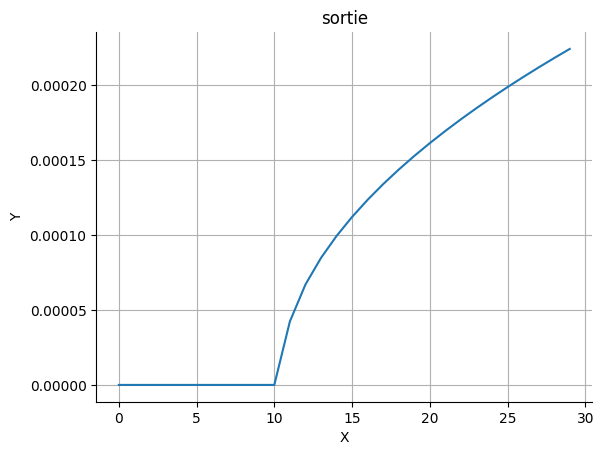

In [10]:
def vQ(vH):
    v=q.subs(H,vH).subs(rho,1000).subs(g,vg).subs(Pa,vPa).subs(k,vK)
    if v<0:
        v=0
    return v

rH=np.arange(0,30,1)

rQ=np.zeros(len(rH))
for i in range(len(rH)):
    rQ[i]=vQ(rH[i])

plotIt(rH, rQ)

### Q4 : Sensibilité du débit par rapport à la hauteur d'eau

- H0 = 20[m]
- Pa0 = 760 [mmHg]

In [11]:

q_m.diff(H)

g*k*rho/(2*sqrt(H*g*rho - Pa))

In [12]:
vPa=760e-3*rho_Hg*vg
S0=q_m.diff(H).subs(H,20).subs(rho,1000).subs(g,vg).subs(Pa,vPa).subs(k,vK)
S0

8.33804132005510e-6

### Q5 : Sensibilité par rapport à la pression

In [13]:
S1=q_m.diff(Pa).subs(H,20).subs(rho,1000).subs(g,vg).subs(Pa,vPa).subs(k,vK)
S1

-8.49953243634566e-10

### Q6 : Relation

In [14]:
q0=q_m.subs(H,20).subs(rho,1000).subs(g,vg).subs(Pa,vPa).subs(k,vK)
q0

0.000161157662634025

In [15]:
qlin_20=q0+S0*(H-20)+S1*(Pa-vPa)
qlin_20

8.3380413200551e-6*H - 8.49953243634566e-10*Pa + 8.05788313170124e-5

In [16]:
qlin_20.subs(H,25).subs(Pa,100000)

0.000204034539954933

In [17]:
qlin_20

8.3380413200551e-6*H - 8.49953243634566e-10*Pa + 8.05788313170124e-5